## Food Data Footprint

In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read the url and pass store it in variable df
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
df = pd.read_csv(url)

In [3]:
# Preview the data
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [4]:
df.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [5]:
df.info() #See column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [6]:
df.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


### The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

1. Filter

In [7]:
# create a dataframe for east african countries
east_africa_df = df[df['country'].isin(['Kenya', 'Uganda', 'Tanzania', 'Ethiopia', 'Rwanda'])]
east_africa_df.shape

# The inverse will be a dataframe for the rest of the world
world_df = df[~df['country'].isin(['Kenya', 'Uganda', 'Ethiopia', 'Tanzania', 'Rwanda'])]
world_df.shape

(1375, 4)

2. Groupby

In [8]:
# To plot the average co2 per person by food category, I simply group the food category by the mean co2_emmission
east_africa_co2_emmission_per_person =east_africa_df.groupby('food_category')['co2_emmission'].sum().sort_values(ascending=True)
world_co2_emmission_per_person = world_df.groupby('food_category')['co2_emmission'].sum().sort_values(ascending=True)

3. Plot

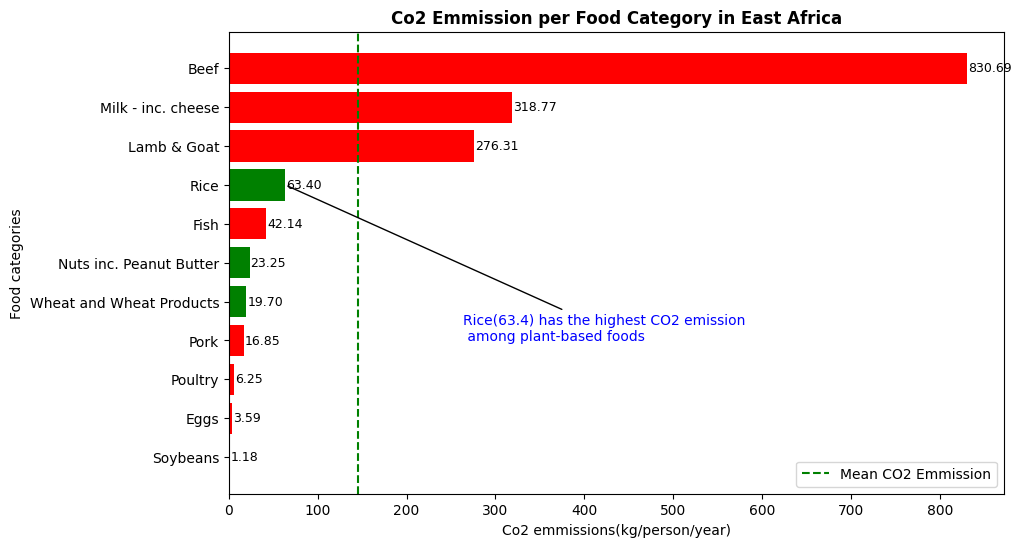

In [64]:
# Creating a tuple for plant based and animal based food categories
animal_based = {'Eggs', 'Poultry', 'Pork', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese', 'Beef'}
plant_based = {'Soybeans', 'Wheat and Wheat Products', 'Rice'}

# Assigning colors for the animal and food based food categories
colors = ['red' if category in animal_based else 'green' for category in east_africa_co2_emmission_per_person.index]

# plotting co2 emmission in east africa
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(east_africa_co2_emmission_per_person.index, east_africa_co2_emmission_per_person, color=colors)

# Annotate bars
for bar in bars:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add a verticle line to show the mean
ax.axvline(x=np.mean(east_africa_co2_emmission_per_person), color='g', linestyle='--', label='Mean CO2 Emmission')

# Set title and x and y labels
ax.set_title('Co2 Emmission per Food Category in East Africa', weight = 'bold' )
ax.set_ylabel('Food categories')
ax.set_xlabel('Co2 emmissions(kg/person/year)')

# Add anotaion to show that 'Rice' category has the highest co2 emmission among plant based category
rice_category = "Rice"
rice_value = east_africa_co2_emmission_per_person[rice_category]
rice_category_index = east_africa_co2_emmission_per_person.index.get_loc(rice_category)
ax.annotate(
    'Rice(63.4) has the highest CO2 emission\n among plant-based foods',
    xy=(rice_value, rice_category),  # Pointing to the rice bar
    xytext=(rice_value + 200, rice_category_index-4),  # Adjust text position
    arrowprops=dict(arrowstyle="-", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)
ax.legend()
# Show plot
plt.show()

- In East Africa,animal based food categories contribute to the highest Co2 emmissions per (kg/person/year), with beef(830.69), milk and cheese products(318) leading.
- Rice(63.40) contributes to the highest Co2 emmissions per(kg/person/year) with soy beans producing the least Co2(1.18).
- All plant products fall below the average Co2 emmissions.

### Comparing Co2 emmissions of East Africa to the rest of the world

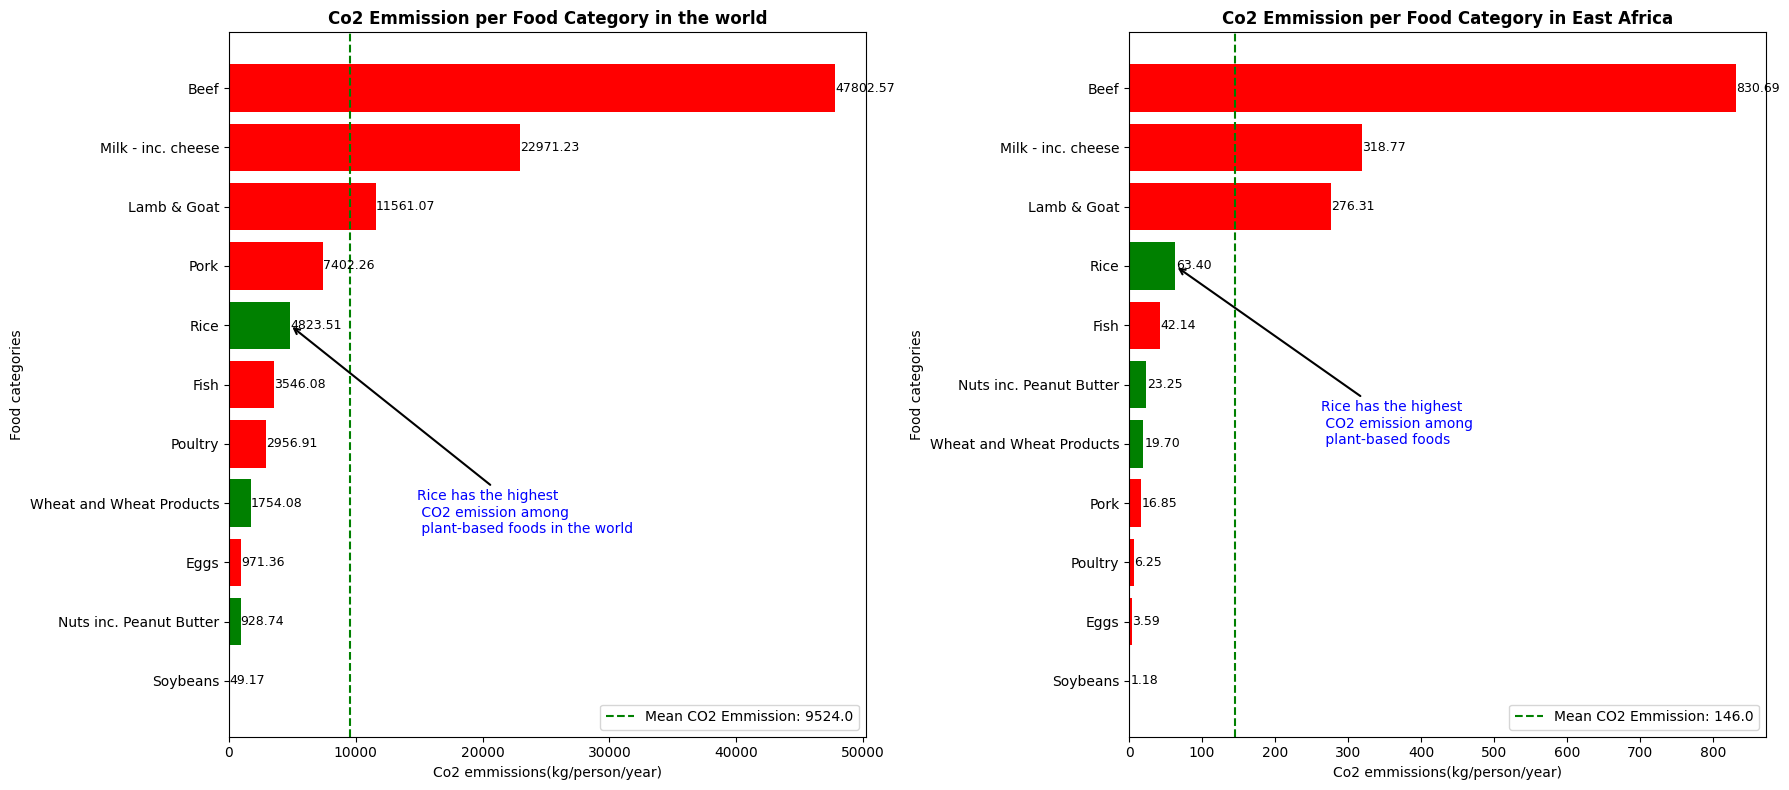

In [54]:
# Creating a tuple for plant based and animal based food categories
animal_based = {'Eggs', 'Poultry', 'Pork', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese', 'Beef'}
plant_based = {'Soybeans', 'Wheat and Wheat Products', 'Rice'}

# Assigning colors for the animal and food based food categories
colors = ['red' if category in animal_based else 'green' for category in world_co2_emmission_per_person.index]
colors1 = ['red' if category in animal_based else 'green' for category in east_africa_co2_emmission_per_person.index]

# plotting co2 emmission in east africa
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ea_bar = ax[1].barh(east_africa_co2_emmission_per_person.index, east_africa_co2_emmission_per_person, color=colors1)
world_bar = ax[0].barh(world_co2_emmission_per_person.index, world_co2_emmission_per_person, color=colors)

for bar in ea_bar:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax[1].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

for bar in world_bar:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax[0].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add a verticle line to show the mean
ax[0].axvline(x=np.mean(world_co2_emmission_per_person), color='g', linestyle='--', label=f'Mean CO2 Emmission: {np.mean(world_co2_emmission_per_person).round()}')
ax[1].axvline(x=np.mean(east_africa_co2_emmission_per_person), color='g', linestyle='--', label=f'Mean CO2 Emmission: {np.mean(east_africa_co2_emmission_per_person).round()}')

# Set title and x and y labels
# Set title and x and y labels
ax[0].set_title('Co2 Emmission per Food Category in the world', weight = 'bold' )
ax[0].set_ylabel('Food categories')
ax[0].set_xlabel('Co2 emmissions(kg/person/year)')
ax[1].set_title('Co2 Emmission per Food Category in East Africa', weight = 'bold' )
ax[1].set_ylabel('Food categories')
ax[1].set_xlabel('Co2 emmissions(kg/person/year)')

# Add anotaion to show that 'Rice' category has the highest co2 emmission among plant based category
rice_category = "Rice"
rice_value = world_co2_emmission_per_person[rice_category]
rice_category_index = world_co2_emmission_per_person.index.get_loc(rice_category)
ax[0].annotate(
    'Rice has the highest\n CO2 emission among \n plant-based foods in the world',
    xy=(rice_value, rice_category_index),  # Pointing to the rice bar
    xytext=(rice_value+10000, rice_category_index-3.5),  # Adjust text position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, color='blue', fontweight='regular'
)
rice_category1 = "Rice"
rice_value1 = east_africa_co2_emmission_per_person[rice_category1]
rice_category_index1 = east_africa_co2_emmission_per_person.index.get_loc(rice_category1)
ax[1].annotate(
    'Rice has the highest\n CO2 emission among \n plant-based foods',
    xy=(rice_value1, rice_category1),  # Pointing to the rice bar
    xytext=(rice_value1+200, rice_category_index1-3),  # Adjust text position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, color='blue', fontweight='regular'
)

ax[0].legend()
ax[1].legend()
# Show plot
plt.tight_layout()
plt.show()

How does East Africa compare to the rest of the world?
- Animal based products contribute to the highes Co2 emmissions per(kg/person/year), notably Beef, Milk and cheese, and lamb and goat.
- Rice has the highest contribution of Co2 emmission among plant based food categories in East Africa and worldwide.
- Pork contributes significantly to the world Co2 emmissions compared to in East Africa.

### Highlight the marked difference between consumption and emissions in certain food product of your choice 

1. Group

In [11]:
# I group food category by mean consumption in the east africa df
east_africa_consumption_per_person = east_africa_df.groupby('food_category')['consumption'].sum().sort_values(ascending=True)
world_consumption_per_person = world_df.groupby('food_category')['consumption'].sum().sort_values(ascending=True)

2. Plot

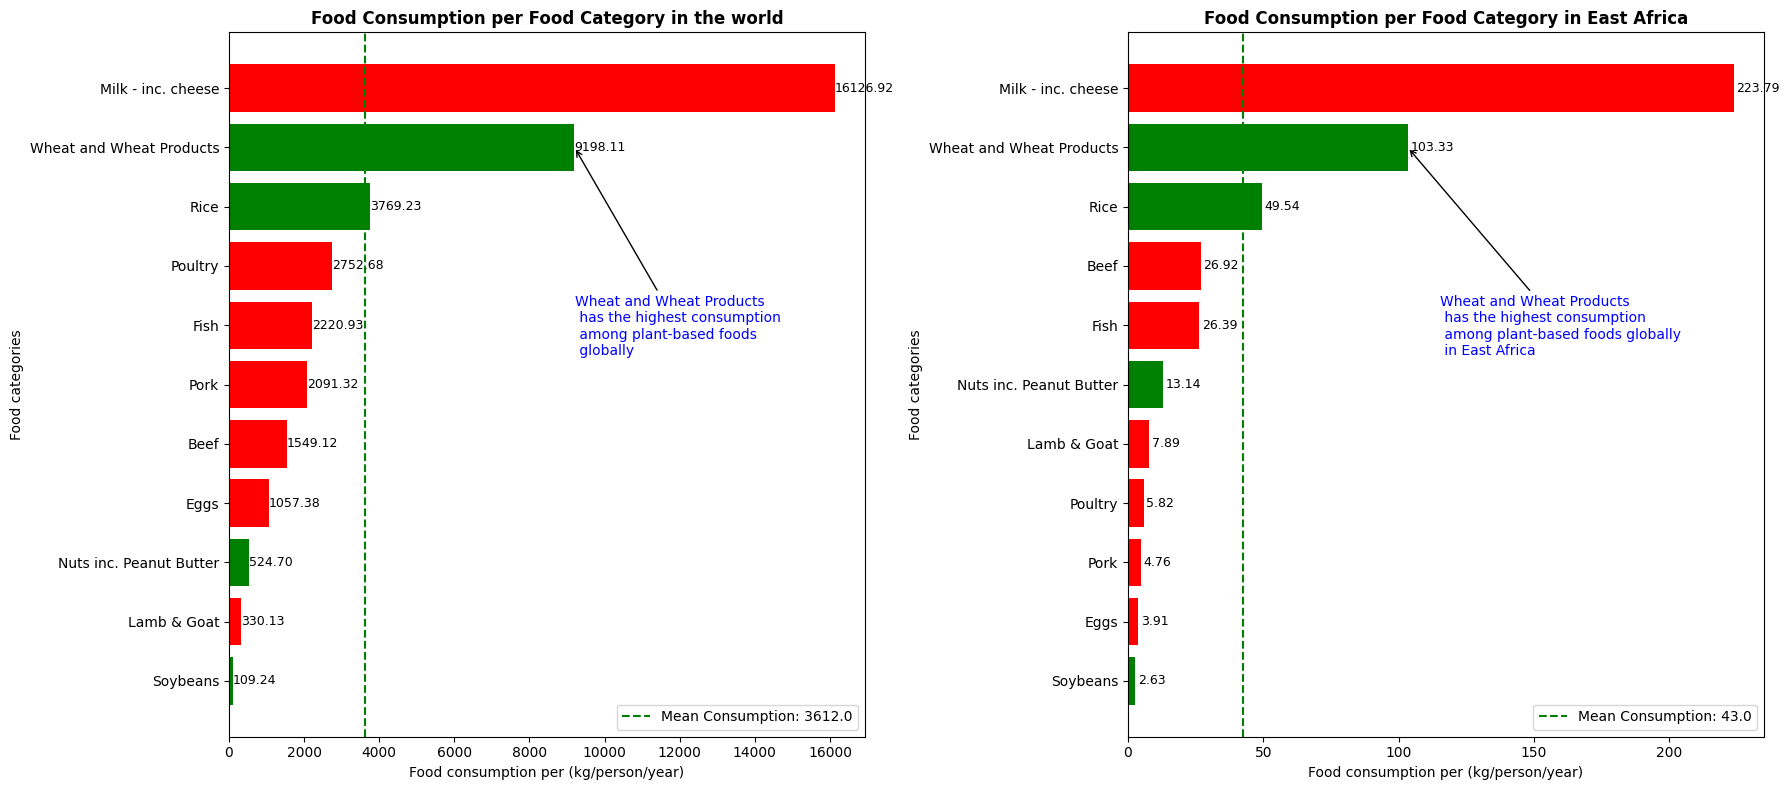

In [68]:
# Creating a tuple for plant based and animal based food categories
animal_based = {'Eggs', 'Poultry', 'Pork', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese', 'Beef'}
plant_based = {'Soybeans', 'Wheat and Wheat Products', 'Rice'}

# Assining colors for the animal and food based food categories
colors_cons = ['red' if category in animal_based else 'green' for category in world_consumption_per_person.index]
colors2_cons = ['red' if category in animal_based else 'green' for category in east_africa_consumption_per_person.index]
# plotting co2 emmission in east africa
fig, ax = plt.subplots(1,2, figsize=(18, 8))
ea_bars = ax[1].barh(east_africa_consumption_per_person.index, east_africa_consumption_per_person, color=colors2_cons)
world_bars = ax[0].barh(world_consumption_per_person.index, world_consumption_per_person, color=colors_cons)
for bar in ea_bars:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax[1].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

for bar in world_bars:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax[0].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add a verticle line to show the mean
ax[0].axvline(x=np.mean(world_consumption_per_person), color='g', linestyle='--', label=f'Mean Consumption: {np.mean(world_consumption_per_person).round()}')
ax[1].axvline(x=np.mean(east_africa_consumption_per_person), color='g', linestyle='--', label=f'Mean Consumption: {np.mean(east_africa_consumption_per_person).round()}')

# Set title and x and y labels
ax[0].set_title('Food Consumption per Food Category in the world', weight = 'bold' )
ax[0].set_ylabel('Food categories')
ax[0].set_xlabel('Food consumption per (kg/person/year)')
ax[1].set_title('Food Consumption per Food Category in East Africa', weight = 'bold' )
ax[1].set_ylabel('Food categories')
ax[1].set_xlabel('Food consumption per (kg/person/year)')

# Add anotaion to show that 'Rice' category has the highest co2 emmission among plant based category

plant_category = "Wheat and Wheat Products"
plant_value = east_africa_consumption_per_person[plant_category]
plant_category_index = east_africa_consumption_per_person.index.get_loc(plant_category) # Get the numeric index position of 'Wheat and Wheat Products' in the DataFrame
ax[1].annotate(
    'Wheat and Wheat Products\n has the highest consumption\n among plant-based foods globally\n in East Africa',
    xy=(plant_value, plant_category),  # Pointing to the wheat bar
    xytext=(plant_value + 12, plant_category_index - 3.5),  # Move annotation down
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)

plant_category1 = "Wheat and Wheat Products"
plant_value1 = world_consumption_per_person[plant_category1]
plant_category_index1 = world_consumption_per_person.index.get_loc(plant_category1)
ax[0].annotate(
    'Wheat and Wheat Products\n has the highest consumption\n among plant-based foods\n globally',
    xy=(plant_value1, plant_category1),  # Pointing to the wheat bar
    xytext=(plant_value1 + 20, plant_category_index1 - 3.5),  # Move annotation down
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)
ax[0].legend()
ax[1].legend()
plt.tight_layout()
# Show plot
plt.show()

World food consumption compared to East Africa
- Milk products and cheese contribute to the highest consumed food products both in East Africa and globally.
- Wheat and wheat products is the most consumed plant based food category globally and in East Africa.
- In both worlds, rice consumption is above the mean consumption by sum of food categories.

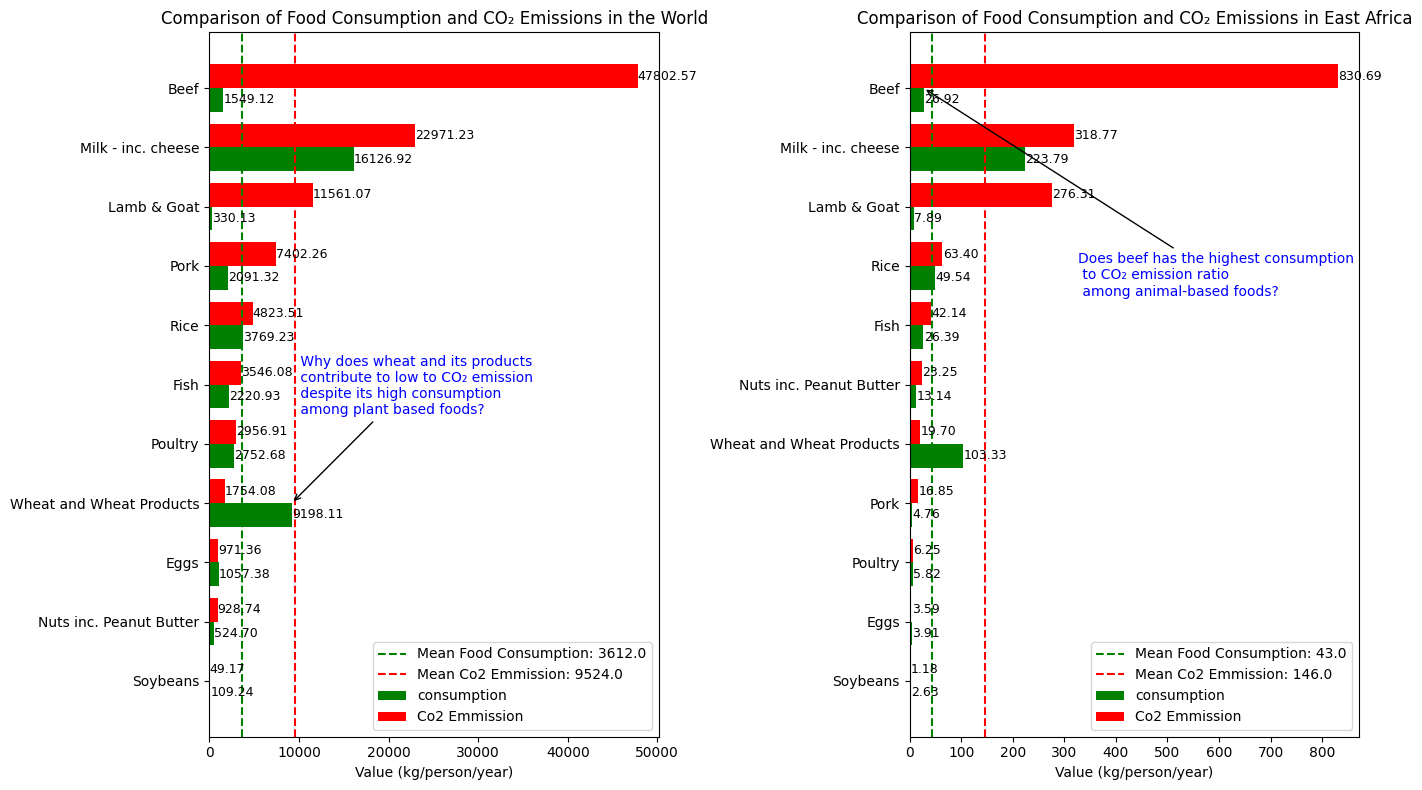

In [13]:
# To highlight the marked difference, I will create a grouped bar plot 
bar_width  = 0.4
consumption_color = 'green'
emmission_color = 'red'

# I find the mean of co2 emmission and food consumptions 
east_africa_df_emmission_consumption =  east_africa_df.groupby('food_category')[['co2_emmission', 'consumption']].sum().sort_values(by = 'co2_emmission', ascending=True)
world_df_emmission_consumption = world_df.groupby('food_category')[['co2_emmission', 'consumption']].sum().sort_values(by = 'co2_emmission', ascending=True)
index = np.arange(len(east_africa_df_emmission_consumption))
index2 = np.arange(len(world_df_emmission_consumption))

# Plot
fig, ax = plt.subplots(1,2, figsize = (14,8))
consumption_bar = ax[1].barh(index - bar_width/2, east_africa_df_emmission_consumption['consumption'], bar_width, label = 'consumption', color = 'green')
Emmission_bar = ax[1].barh(index + bar_width/2, east_africa_df_emmission_consumption['co2_emmission'], bar_width, label = 'Co2 Emmission', color = 'red')

world_consumption_bar = ax[0].barh(index2 - bar_width/2, world_df_emmission_consumption['consumption'], bar_width, label = 'consumption', color = 'green')
world_emmission_bar = ax[0].barh(index2 + bar_width/2, world_df_emmission_consumption['co2_emmission'], bar_width, label = 'Co2 Emmission', color = 'red')

# Add axvline for each east africa
ax[1].axvline(x=np.mean(east_africa_df_emmission_consumption['consumption']), label = f'Mean Food Consumption: {np.mean(east_africa_df_emmission_consumption['consumption']).round()}', linestyle = '--', color = 'green')
ax[1].axvline(x=np.mean(east_africa_df_emmission_consumption['co2_emmission']), label= f'Mean Co2 Emmission: {np.mean(east_africa_df_emmission_consumption['co2_emmission']).round()}', linestyle = '--', color = 'red')

# add axvline for the world
ax[0].axvline(x=np.mean(world_df_emmission_consumption['consumption']), label = f'Mean Food Consumption: {np.mean(world_df_emmission_consumption['consumption']).round()}', linestyle = '--', color = 'green')
ax[0].axvline(x=np.mean(world_df_emmission_consumption['co2_emmission']), label= f'Mean Co2 Emmission: {np.mean(world_df_emmission_consumption['co2_emmission']).round()}', linestyle = '--', color = 'red')

# Add annotations on top of each bar for east africa
for bar in consumption_bar:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax[1].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

for bar in Emmission_bar:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax[1].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add annotations on top of each bar for east africa
for bar in world_consumption_bar:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax[0].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

for bar in world_emmission_bar:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax[0].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')
# Get the animal category and its value
animal_category1 = "Wheat and Wheat Products"
animal_value1 = world_df_emmission_consumption.loc[animal_category1, 'consumption']
animal_category_index1 = world_df_emmission_consumption.index.get_loc(animal_category1)

# Annotate the 'Beef' bar
ax[0].annotate(
    '\n Why does wheat and its products\n contribute to low to CO₂ emission \n despite its high consumption \n among plant based foods?',
    xy=(animal_value1, animal_category_index1),  # Position of 'Beef' bar
    xytext=(animal_value1 + 500, animal_category_index1 + 1.5),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)
# Get the animal category and its value
animal_category = "Beef"
animal_value = east_africa_df_emmission_consumption.loc[animal_category, 'consumption']
animal_category_index = east_africa_df_emmission_consumption.index.get_loc(animal_category)
# Annotate the 'Beef' bar
ax[1].annotate(
    'Does beef has the highest consumption\n to CO₂ emission ratio \n among animal-based foods?',
    xy=(animal_value, animal_category_index),  # Position of 'Beef' bar
    xytext=(animal_value + 300, animal_category_index - 3.5),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)

# Set y-axis ticks and labels properly
ax[1].set_yticks(index)
ax[1].set_yticklabels(east_africa_df_emmission_consumption.index)  # Food category names
ax[0].set_yticks(index)
ax[0].set_yticklabels(world_df_emmission_consumption.index)  # Food category names
# Labels and Title
ax[1].set_xlabel("Value (kg/person/year)")
ax[1].set_title("Comparison of Food Consumption and CO₂ Emissions in East Africa")
ax[1].legend()
ax[0].set_xlabel("Value (kg/person/year)")
ax[0].set_title("Comparison of Food Consumption and CO₂ Emissions in the World")
ax[0].legend()

plt.tight_layout()
plt.show()

Food Consumption and Co2 Emmission in the World compared to East Africa
- Beef appears to produce the Co2 emmission compared to the amount of beef consumed, this can be observed in both worlds.
- Universaly, Wheat and wheat products contribute to very low Co2 emmission per unit of consumption. This could be due to the low inputs required to cultivate wheat and its long shelf life.

In [14]:
# Create a column called consumption to emmission ratio
# I will calculate this ratio by dividing the co2 emmission by consumption 
east_africa_df_emmission_consumption[
    'consumption_to_emmission_ratio'] = east_africa_df_emmission_consumption[
        'co2_emmission']/east_africa_df_emmission_consumption['consumption']
# I will do the same for the world data for comparison
world_df_emmission_consumption[
    'consumption_to_emmission_ratio'] = world_df_emmission_consumption[
        'co2_emmission']/world_df_emmission_consumption['consumption']

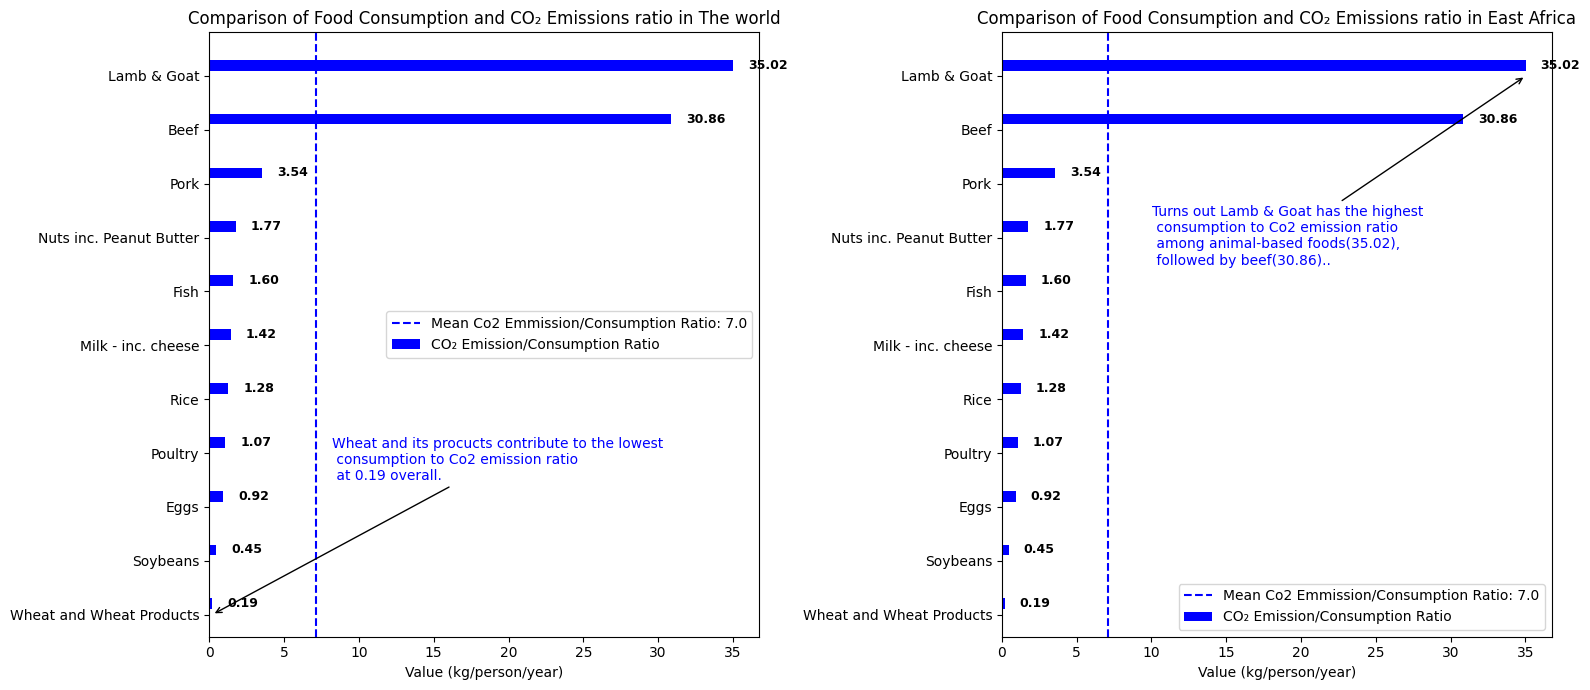

In [49]:
# To highlight the marked difference, I will create a grouped bar plot 
# I will group the food category by co2 emmission, consumption and consumption to emmission ratio 
# Then I will find the mean of co2 emmission and food consumptions 
east_africa_df_emmission_consumption_ratio =  east_africa_df_emmission_consumption.groupby('food_category')[['co2_emmission', 'consumption','consumption_to_emmission_ratio']].sum().sort_values(by = 'consumption_to_emmission_ratio', ascending=True)
world_df_emmission_consumption_ratio = world_df_emmission_consumption.groupby('food_category')[['co2_emmission', 'consumption','consumption_to_emmission_ratio']].sum().sort_values(by = 'consumption_to_emmission_ratio', ascending=True)

# Plot
fig, ax = plt.subplots(1,2,figsize = (16,7))
bar_width  = 0.2 # Initialize a barwidth of 0.3 to offset the bars 
index = np.arange(len(east_africa_df_emmission_consumption_ratio)) 
index_wld = np.arange(len(world_df_emmission_consumption_ratio ))

# World Data
# world_consumption_bar = ax[0].barh(index_wld - bar_width, world_df_emmission_consumption_ratio['consumption'], bar_width, label='Consumption', color='green')
# world_Emmission_bar = ax[0].barh(index_wld, world_df_emmission_consumption_ratio['co2_emmission'], bar_width, label='CO₂ Emission', color='red')
world_ec_ratio = ax[0].barh(index_wld + bar_width, world_df_emmission_consumption_ratio['consumption_to_emmission_ratio'], bar_width, label='CO₂ Emission/Consumption Ratio', color='blue')

# East Africa Data
# ea_consumption_bar = ax[1].barh(index - bar_width, east_africa_df_emmission_consumption_ratio['consumption'], bar_width, label='Consumption', color='green')
# ea_Emmission_bar = ax[1].barh(index, east_africa_df_emmission_consumption_ratio['co2_emmission'], bar_width, label='CO₂ Emission', color='red')
e_c_ratio = ax[1].barh(index + bar_width, east_africa_df_emmission_consumption_ratio['consumption_to_emmission_ratio'], bar_width, label='CO₂ Emission/Consumption Ratio', color='blue')

# Add axvline
ax[0].axvline(x=np.mean(world_df_emmission_consumption_ratio['consumption_to_emmission_ratio']), label= f'Mean Co2 Emmission/Consumption Ratio: {np.mean(world_df_emmission_consumption_ratio['consumption_to_emmission_ratio']).round()}', linestyle = '--', color = 'blue')
ax[1].axvline(x=np.mean(east_africa_df_emmission_consumption_ratio['consumption_to_emmission_ratio']), label= f'Mean Co2 Emmission/Consumption Ratio: {np.mean(east_africa_df_emmission_consumption_ratio['consumption_to_emmission_ratio']).round()}', linestyle = '--', color = 'blue')

for bar in world_ec_ratio:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax[0].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', weight='bold', fontsize=9, color='black')

for bar in e_c_ratio:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax[1].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', weight='bold', fontsize=9, color='black')
# Get the animal category and its value
animal_category0 = "Wheat and Wheat Products"
animal_value0 = world_df_emmission_consumption_ratio.loc[animal_category0, 'consumption_to_emmission_ratio']
animal_category_index0 = world_df_emmission_consumption_ratio.index.get_loc(animal_category0)

# Annotate the 'Beef' bar
ax[0].annotate(
    'Wheat and its procucts contribute to the lowest \n consumption to Co2 emission ratio \n at 0.19 overall.',
    xy=(animal_value0, animal_category_index0),  # Position of 'Lamb and Goat' bar
    xytext=(animal_value0 + 8, animal_category_index0 + 2.5),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)

# Get the animal category and its value
animal_category = "Lamb & Goat"
animal_value = east_africa_df_emmission_consumption_ratio.loc[animal_category, 'consumption_to_emmission_ratio']
animal_category_index = east_africa_df_emmission_consumption_ratio.index.get_loc(animal_category)

# Annotate the lamb and goat
ax[1].annotate(
    'Turns out Lamb & Goat has the highest \n consumption to Co2 emission ratio \n among animal-based foods(35.02), \n followed by beef(30.86)..',
    xy=(animal_value, animal_category_index),  # Position of 'Lamb and Goat' bar
    xytext=(animal_value-25, animal_category_index - 3.5),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)

# Set y-axis ticks and labels properly
ax[0].set_yticks(index_wld)
ax[0].set_yticklabels(world_df_emmission_consumption_ratio.index)  # Food category names
ax[1].set_yticks(index)
ax[1].set_yticklabels(east_africa_df_emmission_consumption_ratio.index)  # Food category names

# Labels and Title
ax[0].set_xlabel("Value (kg/person/year)")
ax[0].set_title("Comparison of Food Consumption and CO₂ Emissions ratio in The world")
ax[0].legend()
ax[1].set_xlabel("Value (kg/person/year)")
ax[1].set_title("Comparison of Food Consumption and CO₂ Emissions ratio in East Africa")
ax[1].legend()

plt.tight_layout()
plt.show()

Comparison of Food Consumption and Co2 Emmission
- The global ratio for food consumption to co2 emmission are similar to the ones in East Africa, this is more of a natural consequence of food systems dynamics rather than a coincedence.
- Lamb and goat contribute to the highest ratios followed by beef, long term this are very unsustanable food categories.
- Wheat and whear products contribute to the lowest ratios of consumption to emmission, this is the most sustainable food category.

### Beef's contribution to CO2 emissions (kg/person/year) - Map this. 

In [17]:
# %pip install geopandas #Install geopandas inline
import geopandas as gpd 

In [18]:
# read the world json df
world = gpd.read_file('country_shapes.geojson') 
world_data = gpd.GeoDataFrame(world, geometry='geometry') # convert into a geodataframe

In [19]:
# Here I proceed to perform an inner join to remove all missing values
merged_world_df = df.merge(
    world_data, how='inner', left_on='country', right_on='cntry_name',
        suffixes=('_left', '_right'))

In [20]:
merged_world_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country        1342 non-null   object  
 1   food_category  1342 non-null   object  
 2   consumption    1342 non-null   float64 
 3   co2_emmission  1342 non-null   float64 
 4   geo_point_2d   1342 non-null   object  
 5   cntry_name     1342 non-null   object  
 6   join_name      1342 non-null   object  
 7   iso2_2         77 non-null     object  
 8   iso_a2         1232 non-null   object  
 9   iso2           1342 non-null   object  
 10  cou_iso3_code  1342 non-null   object  
 11  iso3           1342 non-null   object  
 12  geometry       1342 non-null   geometry
dtypes: float64(2), geometry(1), object(10)
memory usage: 136.4+ KB


In [21]:
# From this data to get only data where food category is equal to beef 
beef_df = merged_world_df[merged_world_df['food_category'] == 'Beef']

# Set country as index column
beef_df = beef_df.set_index('country')

In [22]:
beef_df.head()

,food_category,consumption,co2_emmission,geo_point_2d,cntry_name,join_name,iso2_2,iso_a2,iso2,cou_iso3_code,iso3,geometry
country,,,,,,,,,,,,
Argentina,Beef,55.48,1712.00,"{ ""lon"": -65.167682715300003, ""lat"": -35.37618...",Argentina,Argentina,None,AR,AR,ARG,ARG,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
Australia,Beef,33.86,1044.85,"{ ""lon"": 134.48956278200001, ""lat"": -25.734968...",Australia,Australia,None,AU,AU,AUS,AUS,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
Albania,Beef,22.50,694.30,"{ ""lon"": 20.0683841514, ""lat"": 41.142284591200...",Albania,Albania,None,AL,AL,ALB,ALB,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
Iceland,Beef,13.36,412.26,"{ ""lon"": -18.605466796200002, ""lat"": 64.997588...",Iceland,Iceland,None,IS,IS,ISL,ISL,"POLYGON ((-22.02472 64.41888, -22.02444 64.443..."
New Zealand,Beef,22.49,693.99,"{ ""lon"": 171.77990231000001, ""lat"": -41.838873...",New Zealand,New Zealand,None,NZ,NZ,NZL,NZL,"MULTIPOLYGON (((177.91779 -38.9428, 177.9097 -..."


In [23]:
beef_df.columns

Index(['food_category', 'consumption', 'co2_emmission', 'geo_point_2d',
       'cntry_name', 'join_name', 'iso2_2', 'iso_a2', 'iso2', 'cou_iso3_code',
       'iso3', 'geometry'],
      dtype='object')

In [57]:
# Group by country and calculate the mean of 'co2_emmission' for each country
beef_by_country = beef_df.groupby('country')[['co2_emmission']].mean()

# Merge the result back with the geometry
beef_by_country_with_geom = beef_df.groupby('country').agg({'co2_emmission': 'mean', 'geometry': 'first'})
beef_by_country_with_geom.shape

(122, 2)

In [58]:
# Ensure your DataFrame is a GeoDataFrame
beef_gdf = gpd.GeoDataFrame(beef_by_country_with_geom, geometry='geometry')
beef_by_country_with_geom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   co2_emmission  122 non-null    float64 
 1   geometry       122 non-null    geometry
dtypes: float64(1), geometry(1)
memory usage: 2.9+ KB


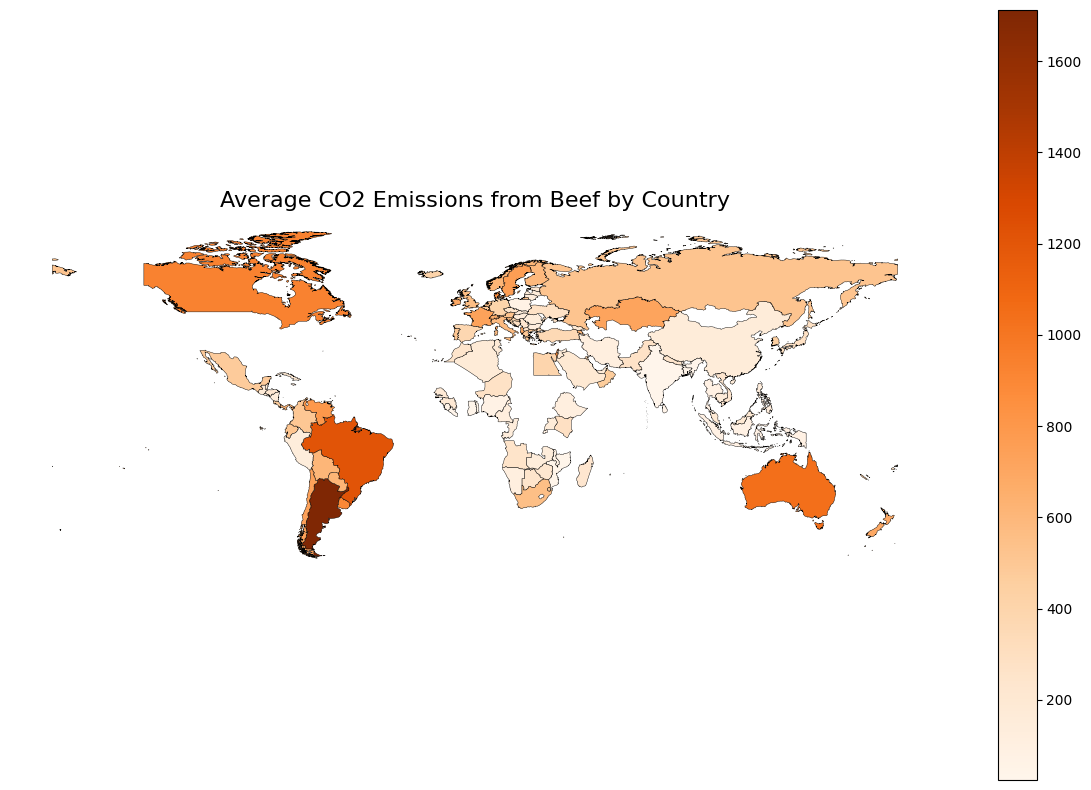

In [59]:
# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the choropleth map
beef_gdf.plot(column='co2_emmission',
              cmap='Oranges',             # Color scheme
              legend=True,
              edgecolor='black',       # Country border color
              linewidth=0.3,           # Border thickness
              missing_kwds={'color': 'grey'},  # Color for missing data
              ax=ax)

# Add the title and remv
plt.title('Average CO2 Emissions from Beef by Country', fontsize=16)
ax.set_axis_off()  # Remove axes
plt.box(False)     # Remove figure border

# Show legend with label
legend = ax.get_legend()
if legend:
    legend.set_title('CO2 Emissions (kg)')

plt.show()

- South America is responsible for very high Co2 emmissions from beef, Argentina is quite conspicuous.

### A box plot and interpretation of the CO2 contributions of food levels. Use this [image](https://pbs.twimg.com/media/EROivo7UYAAygul?format=jpg&name=small) as inspiration 

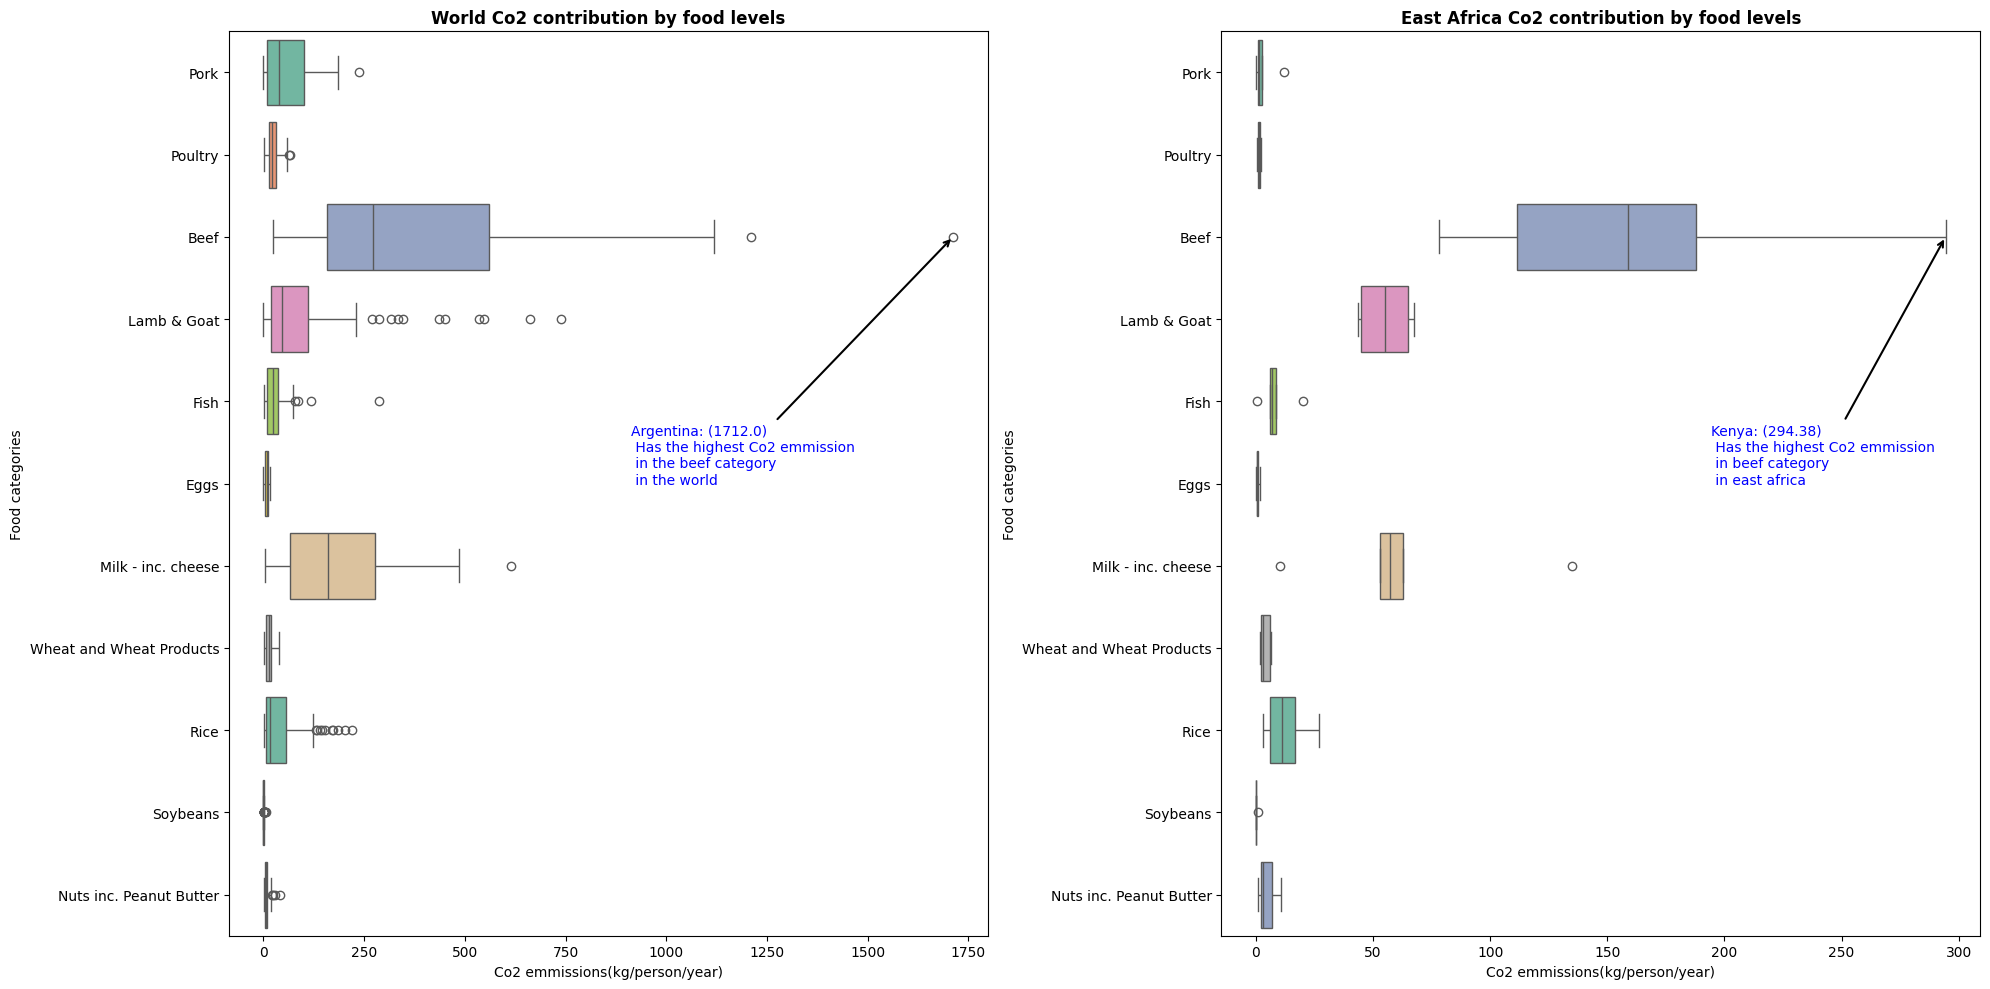

In [27]:
# Create a plot
fig, ax = plt.subplots(1,2, figsize=(20,10))

# I define a color palette (this will generate a different color for each food category)
food_categories_east_africa = east_africa_df['food_category']
food_categories_world = world_df['food_category']

# Use a color palette for unique colors for each category
palette_east_africa = sns.color_palette("Set2", len(food_categories_east_africa.unique()))
palette_world = sns.color_palette("Set2", len(food_categories_world.unique()))

# World df plot
sns.boxplot(data=world_df, y='food_category', x='co2_emmission', palette=palette_world, hue='food_category',ax=ax[0])
ax[0].set_title('World Co2 contribution by food levels', weight='bold')
ax[0].set_ylabel('Food categories')
ax[0].set_xlabel('Co2 emmissions(kg/person/year)')

# East africa plot 
sns.boxplot(data=east_africa_df, y='food_category', x='co2_emmission', palette=palette_east_africa,hue='food_category', ax=ax[1])
ax[1].set_title('East Africa Co2 contribution by food levels', weight='bold')
ax[1].set_ylabel('Food categories')
ax[1].set_xlabel('Co2 emmissions(kg/person/year)')

# Get the max co2 Emmission for each df
easmax = east_africa_df['co2_emmission'].max()
worldmax = world_df['co2_emmission'].max()

# Annotate the highest CO2 emission in World plot with country name
for j, value in enumerate(world_df['co2_emmission']):
    if value == worldmax:  # Condition to annotate the highest CO2 emission
        country = world_df['country'].iloc[j]  # Get the corresponding country/food category
        ax[0].annotate(
            f'{country}: ({value}) \n Has the highest Co2 emmission\n in the beef category \n in the world',  # Text to show (country and emission value)
            xy=(value, j),  # The position of the arrow (x = value, y = index)
            xytext=(value - 800, j +3),  # Where the text will be placed
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),  # Customize arrow style
            fontsize=10, color='blue', fontweight='regular'  # Text style
        )

# Annotate the highest CO2 emission in East Africa plot with country name
for i, value in enumerate(east_africa_df['co2_emmission']):
    if value == easmax:  # Condition to annotate the highest CO2 emission
        country = east_africa_df['country'].iloc[i]  # Get the corresponding country/food category
        ax[1].annotate(        
            f'{country}: ({value})\n Has the highest Co2 emmission \n in beef category \n in east africa',  # Text to show (country and emission value)
            xy=(value, i),  # The position of the arrow (x = value, y = index)
            xytext=(value - 100 , i + 3),  # Where the text will be placed
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),  # Customize arrow style
            fontsize=10, color='blue', fontweight='regular'  # Text style
        )

plt.tight_layout()
plt.show()

- Argentina is among the highest co2 emmission by food category in the world, on the other hand, Kenya is in the top percentile of East African countries with the highest Co2 emmission by beef food category.

### Top 10 Countries with highest emissions. Choose the appropriate visual type. Get inspiration from this [image](https://pbs.twimg.com/media/ERFZGueW4AEEwSo?format=png&name=large) 

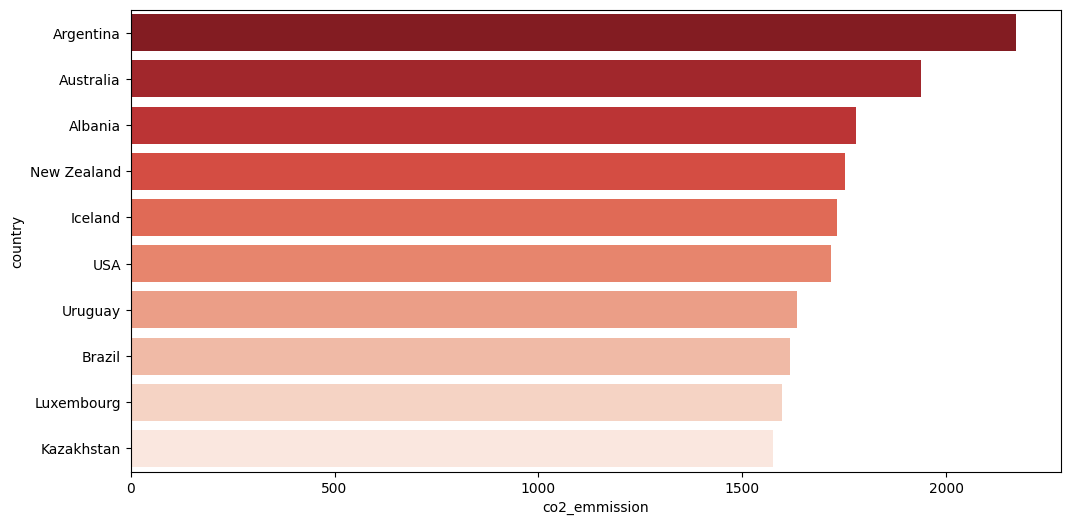

In [28]:
# I group country by the sum co2 emmission
highest_emmission = df.groupby('country')['co2_emmission'].sum()
# I sort values by ascending and pick top ten countries
highest_emmission = highest_emmission.sort_values(ascending=False).head(10) 
# I convert the grouped data into a pandas df 
highest_emmission_df = pd.DataFrame(highest_emmission)

# Plotting 
fig, ax =plt.subplots(figsize = (12,6))
sns.barplot(
    data = highest_emmission_df,
     y = 'country',
      x = 'co2_emmission',
       palette='Reds_r',
        hue='country',
         ax=ax)
plt.show()

- South America, North America and Australian countries are the biggest contributors of Co2 emmission per (kg/person/year) compared to other parts of the world.